# Mechanisms of word segmentation
In this assignment, you will implement a *statistical learning* mechanism to perform word segmentation on a stream of syllables from an artificial language. Before starting work on the assigment, you should read the following papers:

- Aslin, R. N., Saffran, J. R., & Newport, E. L. (1998). Computation of conditional probability statistics by 8-month-old infants. *Psychological Science, 9*(4), 321-324. https://doi.org/10.1111/1467-9280.00063

- Brent, M. R., & Cartwright, T. A. (1996). Distributional regularity and phonotactic constraints are useful for segmentation. *Cognition, 61*(1-2), 93-125.

Note that all example images in this Colab notebook are just that: example images. Your data will lead to different figures and conclusions than the data used to create these examples.

## The problem

Infants are exposed to language even before they are born. However, the language infants are exposed to do not contain clear information about its structure, after all what reaches the infants' ears is just one big stream of sounds. In order to learn a language, it is necessary to break down this stream of sounds into its basic structural components: words.

Luckily, the infant's brain is smart enough to use what information *is* available: statistical information about transitional probabilities between syllables (and phonemes, and words, etc., but in this assignment we will focus on syllables).

For example, the phrase "pretty baby" is probably often heard by an infant, but from the sound "pret ty ba by" it is not clear what the word boundaries are. After all, "pret | ty ba by" seems just as good as a segmentation as "pret ty ba | by" and "pret ty | ba by" or even "pret | ty | ba | by". However, as exposure to language increases, and words are used in different sentences, the infant learns that "ba" often follows "ty", whereas "ba ty" is not often heard. Syllable combinations occur more frequently within words than between words. We call this the *transitional probability*. It is defined as:

$P(y|x) = \frac{p(x,y)}{p(x)} = \frac{\textrm{freq}(x,y)}{\textrm{freq}(x)}$

where the probability of syllable $y$ following syllable $x$ equals the frequency of $x$ and $y$ co-occurring divided by the frequency of $x$ itself. Now we can use this information on our stream of syllables in our artificial language

Let's get started!

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Load and inspect your input data

It is good practice to inspect the input data and get a feel for its contents and structure. Given that the input data is a stream of syllables, you should inspect our problem space.

### Assignment 1.1
Load the data and take a look at its contents. The input is represented as one large stream of syllables. Print the entire unsegmented input. You will need to separate each syllable before we can perform word segmentation.



In [ ]:
!wget -qO input.txt https://surfdrive.surf.nl/files/index.php/s/dKdTYm89yqSGbsz/download

with open("input.txt") as f:
    rawdata = f.read()

rawdata

'lu ki bo ra ti bu do ti bu do lu ki bo ra lu ki bo ra lu ki bo ra da ro pi fe da ro pi fe lu ki bo ra da ro pi fe ti bu do ti bu do pa bi ku lu ki bo ra ti bu do ti bu do pa bi ku ti bu do lu ki bo ra po ta gu du ti bu do po ta gu du pa bi ku lu ki bo ra go la tu da ro pi fe pa bi ku lu ki bo ra lu ki bo ra lu ki bo ra pa bi ku ti bu do go la tu lu ki bo ra lu ki bo ra da ro pi fe ti bu do da ro pi fe pa bi ku lu ki bo ra lu ki bo ra ti bu do lu ki bo ra go la tu po ta gu du ti bu do pa bi ku lu ki bo ra lu ki bo ra go la tu lu ki bo ra lu ki bo ra lu ki bo ra lu ki bo ra ti bu do go la tu lu ki bo ra lu ki bo ra go la tu lu ki bo ra go la tu lu ki bo ra lu ki bo ra ti bu do go la tu lu ki bo ra ti bu do po ta gu du ti bu do po ta gu du ti bu do lu ki bo ra da ro pi fe po ta gu du ti bu do da ro pi fe po ta gu du po ta gu du la da ro pi fe lu ki bo ra lu ki bo ra lu ki bo ra pa bi ku ti bu do po ta gu du po ta gu du da ro pi fe po go la tu go la tu ti bu do po ta gu du ti bu do la lu 

### Assignment 1.2

Now, create a plot of all syllables in the input and their frequencies. It should look similar to this: <figure>
      <img src="https://surfdrive.surf.nl/files/index.php/s/I01fE2vrpyrBfHx/download" alt="Frequency plot" style="width:400pt">
      </figure>

<Axes: >

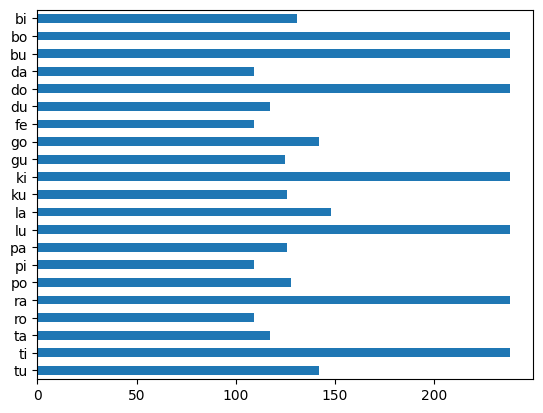

In [ ]:
syllables = rawdata.split()
syllable_counts = pd.Series(syllables).value_counts()
syllable_counts = syllable_counts.sort_index(ascending=False)

syllable_counts.plot(kind='barh')

## Part 2. Transitional probabilities

Now that you have a good feel for the data, you can start looking at the transitional probabilities between syllables. Remember the definition of the transitional probability:

$P(y|x) = \frac{p(x,y)}{p(x)} = \frac{\textrm{freq}(x,y)}{\textrm{freq}(x)}$

which makes it clear that you need to do something with the frequencies of the syllables.

### Assignment 2.1

You will need to calculate $P(y|x)$ for each co-occurrence of syllables in the input stream. Define a function that takes as an input the stream of syllables, and outputs a data structure containing the transitional probabilities. Then run that function using the stream of syllables.

In [ ]:
# def transitional_probabilities(syllables):
#   transitions = {}
#   counter = {}

#   for i in range(len(syllables) - 1):
#       curr_syllable, next_syllable = syllables[i], syllables[i + 1]
#       if curr_syllable not in transitions:
#           transitions[curr_syllable] = {}
#           counter[curr_syllable] = 0
#       if next_syllable not in transitions[curr_syllable]:
#           transitions[curr_syllable][next_syllable] = 0
#       transitions[curr_syllable][next_syllable] += 1
#       counter[curr_syllable] += 1

#   for curr_syllable in transitions:
#       for next_syllable in transitions[curr_syllable]:
#           transitions[curr_syllable][next_syllable] /= counter[curr_syllable]

#   return transitions
def transitional_probabilities(syllables):
  transitions = {syllable: {} for syllable in set(syllables)}
  counter = {syllable: 0 for syllable in set(syllables)}

  for i in range(len(syllables) - 1):
      curr_syllable, next_syllable = syllables[i], syllables[i + 1]
      transitions[curr_syllable][next_syllable] = transitions[curr_syllable].get(next_syllable, 0) + 1
      counter[curr_syllable] += 1

  for curr_syllable in transitions:
      for next_syllable in transitions[curr_syllable]:
          transitions[curr_syllable][next_syllable] /= counter[curr_syllable]

  return transitions

probability_matrix = transitional_probabilities(syllables)

### Assignment 2.2

You should now print the transitional probabilities for each co-occurring pair of syllables. The output should take the form of

```
Transition from 'do' to 'lu': 0.33
```

Print each combination on a separate line.


In [ ]:
for first_syllable in probability_matrix:
    for second_syllable in probability_matrix[first_syllable]:
        print(f"Transition from '{first_syllable}' to '{second_syllable}': {probability_matrix[first_syllable][second_syllable]}")

Transition from 'du' to 'ti': 0.28205128205128205
Transition from 'du' to 'pa': 0.11965811965811966
Transition from 'du' to 'po': 0.1623931623931624
Transition from 'du' to 'la': 0.017094017094017096
Transition from 'du' to 'da': 0.08547008547008547
Transition from 'du' to 'go': 0.1452991452991453
Transition from 'du' to 'lu': 0.18803418803418803
Transition from 'la' to 'tu': 0.9594594594594594
Transition from 'la' to 'da': 0.013513513513513514
Transition from 'la' to 'lu': 0.006756756756756757
Transition from 'la' to 'po': 0.006756756756756757
Transition from 'la' to 'ti': 0.006756756756756757
Transition from 'la' to 'go': 0.006756756756756757
Transition from 'ro' to 'pi': 1.0
Transition from 'ta' to 'gu': 1.0
Transition from 'bo' to 'ra': 1.0
Transition from 'gu' to 'du': 0.936
Transition from 'gu' to 'pa': 0.016
Transition from 'gu' to 'lu': 0.008
Transition from 'gu' to 'go': 0.008
Transition from 'gu' to 'po': 0.008
Transition from 'gu' to 'gu': 0.008
Transition from 'gu' to 'ti':

## Part 3. Performing word segmentation

Now that you have all necessary transitional probabilities, you can start word segmentation on the original input.

### Assignment 3.1
Start by plotting the transitional probabilities for the first 30 syllables in the input. This should look similar to this:

<figure>
      <img src="https://surfdrive.surf.nl/files/index.php/s/ktO0iSQZ9X7Oc12/download" alt="Random walk" style="width:400pt">
      </figure>

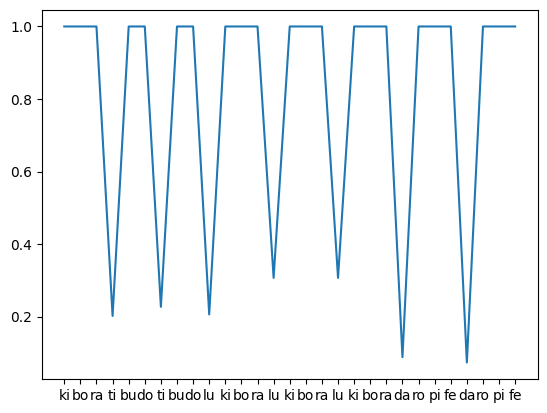

In [ ]:
xlabels = syllables[1:30] #
xpoints = range(29) #
ypoints = np.array(np.zeros(29)) #

for n in range(0,29):
  ypoints[n] = probability_matrix[syllables[n]][syllables[n+1]]

plt.plot(xpoints, ypoints)
plt.xticks(ticks=xpoints, labels=xlabels)

plt.show()

This is enough information for you to segment the complete input.

### Assignment 3.2
Write a function that takes as an input the original input (stream of syllables) and outputs all unique words of at least two syllables. Now print all unique words of at least two syllables, each word on its own line. The output should take the form of:

```
di ru po
du ba
lu si be
```



In [ ]:
def return_unique_words(data, threshold):
  syllables = np.array(data.split())
  unique_words = set()
  word = [syllables[0]]

  for n in range(len(syllables)-1):
    syl = syllables[n]
    new_syl = syllables[n+1]

    if probability_matrix[syl][new_syl] > threshold:
      word.append(new_syl)
    else:
      unique_words.add(tuple(word))
      word = [new_syl]

  unique_words.add(tuple(word))
  unique_words = [x for x in unique_words if len(x)>1]
  return unique_words

for w in return_unique_words(rawdata,  0.4):
  print(' '.join(w))

lu ki bo ra
po ta gu du
go la tu
da ro pi fe
ti bu do
pa bi ku


### Assignment 3.3
Now that you have identified the words in the input stream, it is time to perform word segmentation on the entire input. You will output the segmented input stream to a text file `output.txt`. The input stream took the form of an unsegmented stream of syllables such as `di ru pa bo pu bi re di ru pa bo do lo mu...`. Now you will create an output that is segmented, taking the form of `dirupabo pubire dirupabo dolomu...`. The output file should not contain any line breaks.

In [ ]:
def process_output(data):
  words = return_unique_words(data, 0.4)
  for w in words:
    data = data.replace(' '.join(w), ''.join(w))
  return data

with open("output.txt", "w") as f:
  f.write(process_output(rawdata))
print(process_output(rawdata))

lukibora tibudo tibudo lukibora lukibora lukibora daropife daropife lukibora daropife tibudo tibudo pabiku lukibora tibudo tibudo pabiku tibudo lukibora potagudu tibudo potagudu pabiku lukibora golatu daropife pabiku lukibora lukibora lukibora pabiku tibudo golatu lukibora lukibora daropife tibudo daropife pabiku lukibora lukibora tibudo lukibora golatu potagudu tibudo pabiku lukibora lukibora golatu lukibora lukibora lukibora lukibora tibudo golatu lukibora lukibora golatu lukibora golatu lukibora lukibora tibudo golatu lukibora tibudo potagudu tibudo potagudu tibudo lukibora daropife potagudu tibudo daropife potagudu potagudu la daropife lukibora lukibora lukibora pabiku tibudo potagudu potagudu daropife po golatu golatu tibudo potagudu tibudo la lukibora lukibora tibudo lukibora tibudo tibudo tibudo po golatu lukibora pabiku daropife golatu daropife lukibora lukibora golatu lukibora gu pabiku pabiku daropife pabiku tibudo golatu lukibora lukibora daropife golatu lukibora golatu tibu

# Conclusion

That's it! You have now used transitional probabilities learned from language exposure to perform word segmentation, just like infants do.